# **Gruid Translator**
To the extent possible under law, the person who associated CC0 with **Gruid Translator** has waived
all copyright and related or neighboring rights to **Gruid Translator**.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sys.path.insert(0, "../src")
import constants as c
import file_io as io
import gemcevent_handler as gemc_eh
import gruidevent_handler as gruid_eh

In [2]:
e_100MeV = ["/home/twig/data/code/babycal/generators/bcal_20210421090546_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210421090550_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210421090553_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210421090555_r101c51.txt"]
e_200MeV = ["/home/twig/data/code/babycal/generators/bcal_20210422083957_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210422084002_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210422084010_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210422084014_r101c51.txt"]
e_400MeV = ["/home/twig/data/code/babycal/generators/bcal_20210423090030_r101c51.txt",
            "/home/twig/data/code/babycal/generators/bcal_20210423090034_r101c51.txt"]
m_10GeV  = ["/home/twig/data/code/babycal/bcal_generator/out/bcal_20210413093129_r101c51.txt"]

fevent = 1
nevents = 1
nrows = 101
ncols =  51
nrowsa = int((nrows+1)/2)
nrowsb = int((nrows-1)/2)

Dx = (0.1 * ncols)/2.
Dy = (0.1 + (nrows - 1) * (0.05 * 1.732050808 + 0.05))/2.

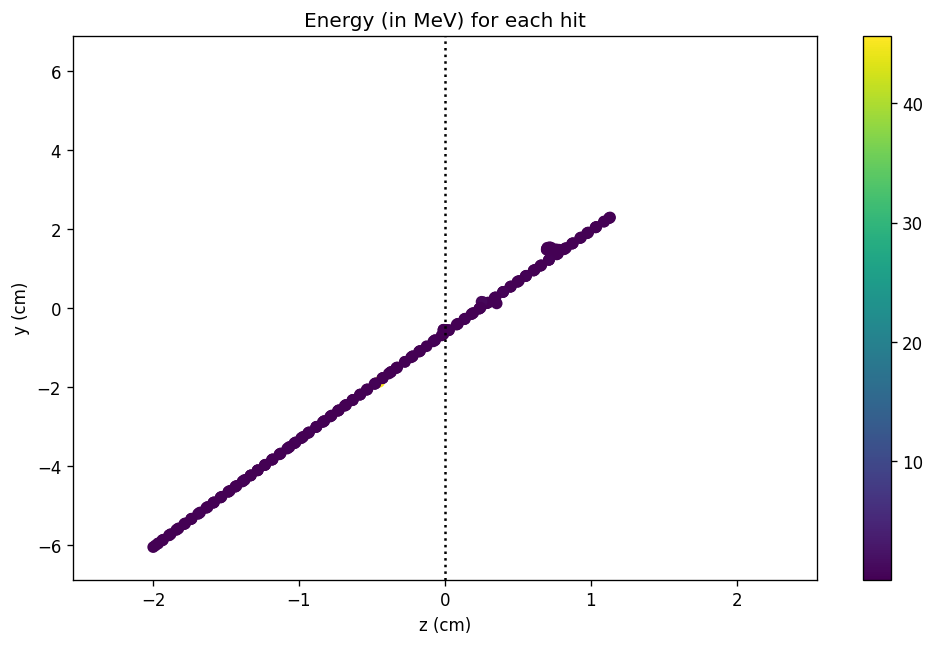

In [34]:
ARR = m_10GeV

xaxis = 'z'
yaxis = 'y'
color = 'E'
for INFILE in ARR:
    # Load gemc file
    (path, filename) = io.split_address(INFILE)
    if nrows is None and ncols is None: (nrows, ncols) = io.decode_filename(filename)
    (metadata, events) = io.load_file(INFILE, fevent, nevents)

    # Store and process hits
    gemchitsdict = gemc_eh.extract_hits(events[0])

    plt.figure(num=1, figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.axvline(x=0, ymin=0, ymax=1, color="black", linestyle='dotted')
    plt.scatter(gemchitsdict[c.S_MASSHITS][xaxis],
                gemchitsdict[c.S_MASSHITS][yaxis],
                c=gemchitsdict[c.S_MASSHITS][color])
    plt.xlim([-Dx, Dx])
    plt.ylim([-Dy, Dy])
    plt.colorbar()
    plt.title("Energy (in MeV) for each hit")
    plt.xlabel(xaxis + " (cm)")
    plt.ylabel(yaxis + " (cm)")
    plt.show()

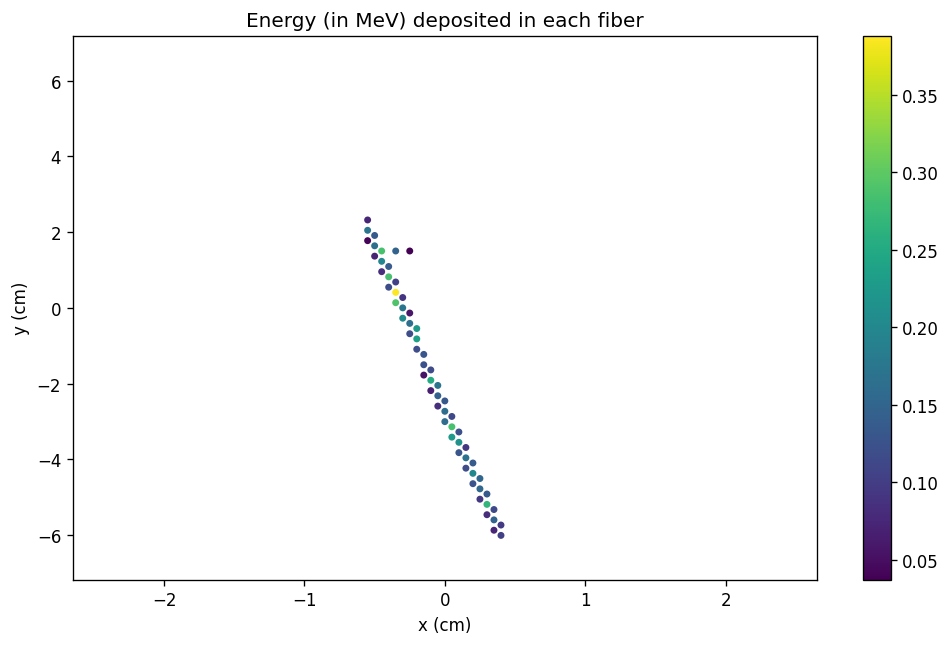

In [26]:
# Associate volume ids with coordinates
def generate_id(i_row_id, i_vol_id, i_nx, i_ny):
    row_id = 10**9*i_row_id
    vol_id = 10**8*i_vol_id
    nx     = 10**4*i_nx
    ny     = 10**0*i_ny
    return (row_id + vol_id + nx + ny)

ARR = m_10GeV

for INFILE in ARR:
    # Load gemc file.
    (path, filename) = io.split_address(INFILE)
    (metadata, events) = io.load_file(INFILE, fevent, nevents)

    x   = []
    y   = []
    vid = []
    for nx in range(ncols):
        for ny in range(nrowsa):
            vid.append(generate_id(0, 1, nx, ny))
            x.append(-Dx + 0.05 + 2*0.05*nx)
            y.append(-Dy + 0.05 + (0.05 * 1.732050808 + 0.05)*ny * 2)
    for nx in range(ncols-1):
        for ny in range(nrowsb):
            vid.append(generate_id(1, 1, nx, ny))
            x.append(2*0.05*nx + 0.1 - Dx)
            y.append(-Dy + 0.05 + (0.05*1.732050808 + 0.05)*ny*2 + 0.05*1.732050808 + 0.05)

    # Get energy deposited per volume
    vols = [int(x)   for x in events[0]["integrated digitized bank"]["id"]]
    E    = [float(x) for x in events[0]["integrated raw bank"]["totEdep"]]
    Edep = []
    for i in range(len(vid)):
        Edep.append(0)
        for j in range(len(vols)):
            if vid[i] == vols[j]:
                Edep[i] += E[j]

    # Remove fibers with no hits to clean plot.
    for i in reversed(range(len(Edep))):
        if Edep[i] == 0:
            x.pop(i)
            y.pop(i)
            Edep.pop(i)

    # Draw that shit.
    plt.figure(num=1, figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.scatter(x, y, c=Edep, s=10)
    plt.xlim([-Dx-0.1, Dx+0.1])
    plt.ylim([-Dy-0.3, Dy+0.3])

    plt.title("Energy (in MeV) deposited in each fiber")
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.colorbar()

    plt.show()